<a href="https://colab.research.google.com/github/Dharma4641/-assignment3/blob/main/aiml4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os
import cv2

In [ ]:
path=os.listdir('/content/drive/MyDrive/psorasis2/TRAIN')
classes={'YES':1,'NO':0}

COVERTING TO X_LABLE AND Y_LABLE

In [ ]:
X=[]
Y=[]
for i in classes:
  path1='/content/drive/MyDrive/psorasis2/TRAIN/'+i
  for j in os.listdir(path1):
    img=cv2.imread(path1+'/'+j,0)
    img=cv2.resize(img,(180,180))
    X.append(img)
    Y.append(classes[i])

In [ ]:
np.unique(Y)

array([0, 1])

CONVERTING TO ARRAYS

In [ ]:
X=np.array(X)
Y=np.array(Y)

In [ ]:
print(X)

[[[ 52  63  59 ... 163 143 150]
  [ 46  57  61 ... 143 151 149]
  [ 55  46  58 ... 156 138 142]
  ...
  [ 83  81  85 ... 130 129 131]
  [ 78  83  79 ... 126 135 130]
  [ 82  83  78 ... 133 124 133]]

 [[ 39  40  39 ...  15  15  13]
  [ 41  42  43 ...  14  14  14]
  [ 42  43  43 ...  13  13  15]
  ...
  [ 57  75  57 ...   7   8   8]
  [ 58  55  56 ...   7   8   8]
  [ 59  53  55 ...   7   8   8]]

 [[ 12  10  13 ...  17  23  24]
  [ 11   6  13 ...  11  28  36]
  [  3   6  17 ...   4  28  33]
  ...
  [ 46  52  92 ...   8   9   8]
  [ 52  53  54 ...   9   9   8]
  [ 65  50  62 ...  10   9   7]]

 ...

 [[208 207 207 ... 254 254 255]
  [210 204 205 ... 255 255 255]
  [225 217 214 ... 255 255 255]
  ...
  [206 204 202 ... 224 222 223]
  [203 202 200 ... 225 224 224]
  [205 203 201 ... 227 225 223]]

 [[255 255 255 ...  69  60  43]
  [255 255 255 ...  65  80  57]
  [255 255 255 ...  71  64  86]
  ...
  [255 255 255 ... 228 225 223]
  [255 255 255 ... 227 226 225]
  [255 255 255 ... 222 224 2

In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
pd.Series(Y).value_counts()

1    1196
0    1054
dtype: int64

In [ ]:
X.shape

(2250, 180, 180)

In [ ]:
Y.shape

(2250,)

PRINTING IMAGES OF FIXED SIZE (180)(180)

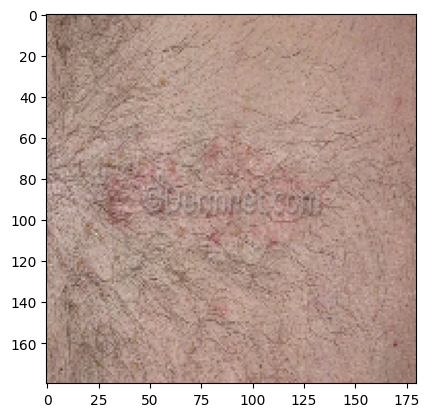

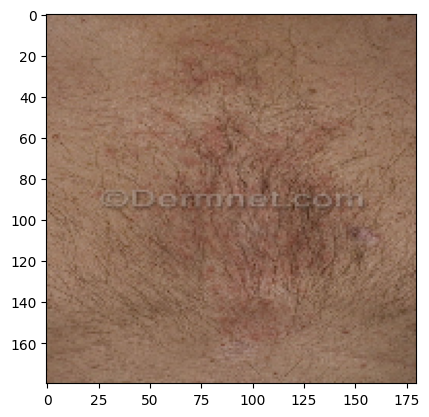

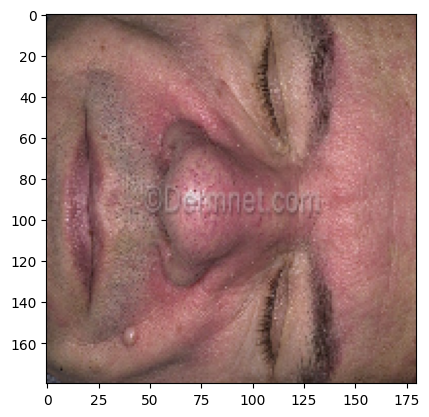

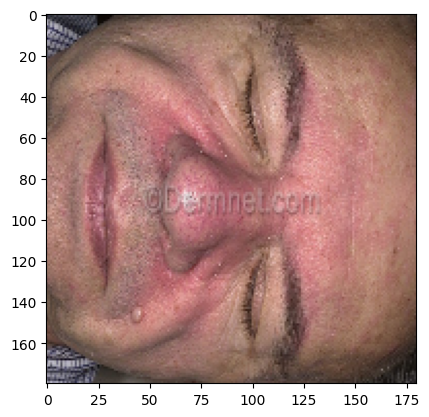

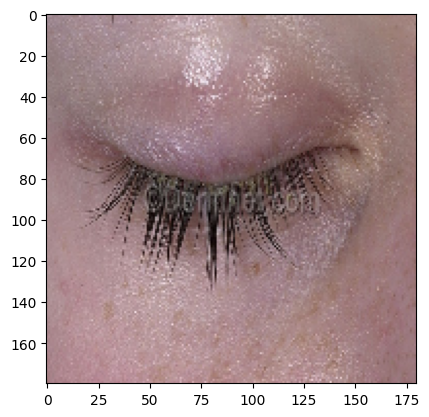

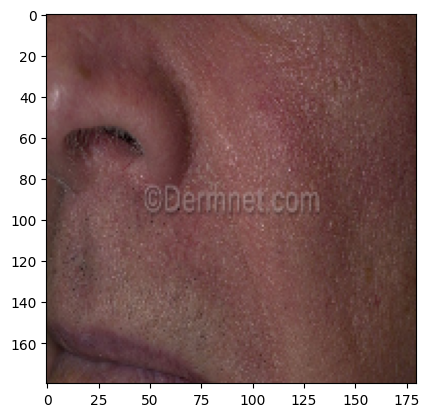

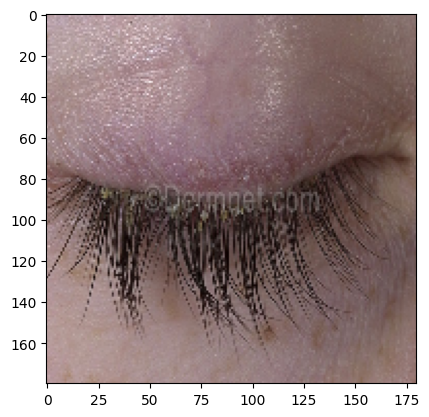

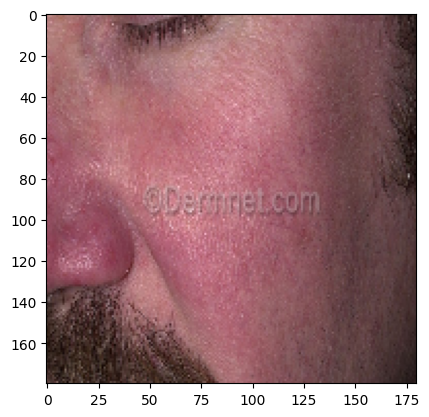

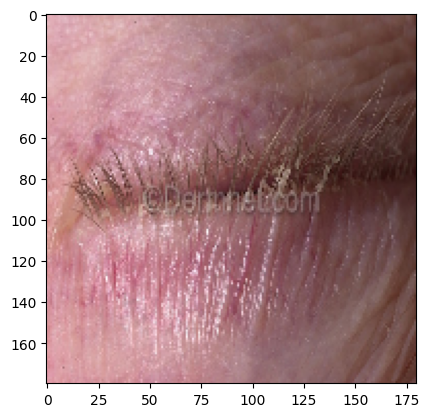

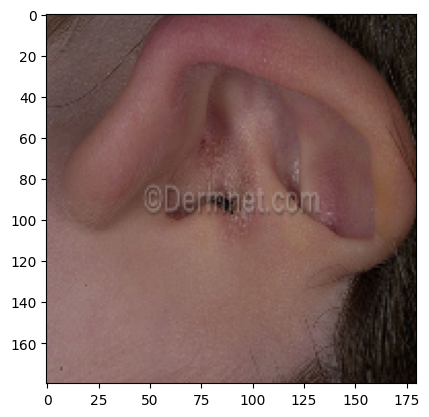

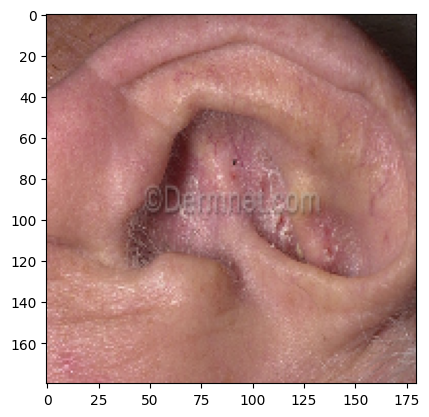

In [ ]:
import os
path2="/content/drive/MyDrive/psorasis2/TRAIN/YES"
img_data2=[]
count=0
images=os.listdir(path2)
for img in images:
    img_arr1=cv2.imread(os.path.join(path2,img))
    img_arr1=cv2.resize(img_arr1,(180,180))
    img_data2.append(img_arr1)
    converted = cv2.cvtColor(img_arr1,cv2.COLOR_BGR2RGB)
    plt.figure()
    count=count+1
    plt.imshow(converted,cmap='gray')
    if count==40:
      break


CONVERTING IMAGES TO GRAY SCALE IMAGE

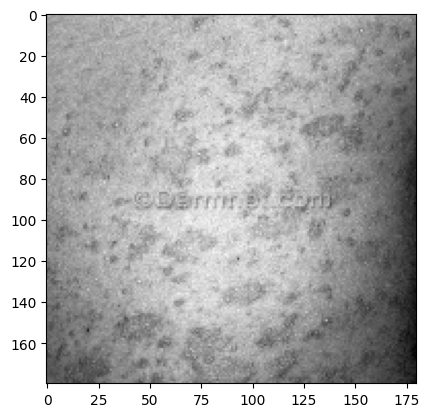

In [ ]:

#for i in range(0,100):
plt.imshow(X[500],cmap='gray')

In [ ]:
path2='/content/drive/MyDrive/psorasis2/TRAIN'
images=os.listdir(path2)
for img in images:
  img_arr=cv2.imread(os.path.join(path2,img))

In [ ]:
X=X.reshape(len(X),-1)
X.shape

(2250, 32400)

LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,stratify=Y, random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9715808170515098


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, Y_train)
pipe.score(X_test, Y_test)

0.9733570159857904

In [ ]:
print(classification_report(Y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       258
           1       0.98      0.97      0.98       305

    accuracy                           0.97       563
   macro avg       0.97      0.97      0.97       563
weighted avg       0.97      0.97      0.97       563



In [ ]:
pred=pipe.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred)
cm

array([[252,   6],
       [  9, 296]])

Text(95.72222222222221, 0.5, 'Truth values')

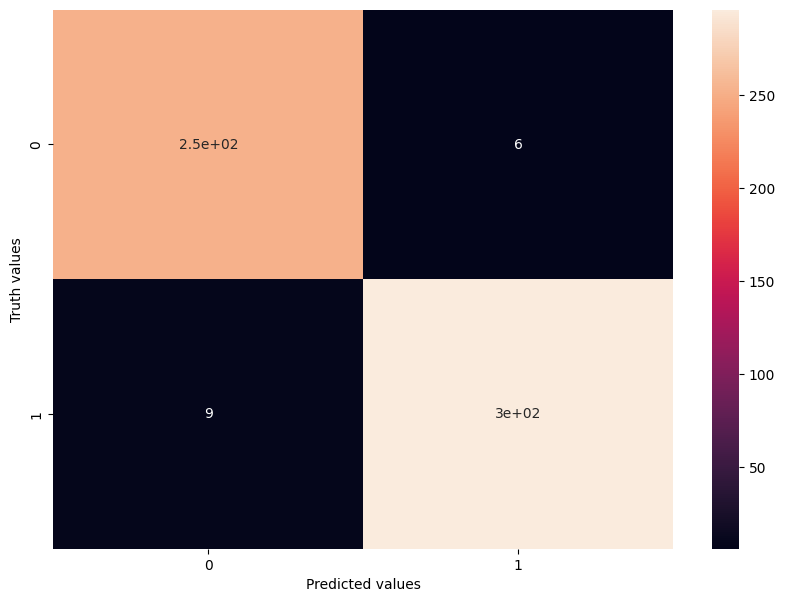

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Truth values')

KNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,stratify=Y, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import classification_report
y_pred=classifier.predict(X_test)
print(classification_report(Y_test,y_pred))
print("accuracy score in knn is:",accuracy_score(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77       264
           1       0.77      0.92      0.84       299

    accuracy                           0.81       563
   macro avg       0.83      0.80      0.80       563
weighted avg       0.82      0.81      0.81       563

accuracy score in knn is: 0.8099467140319716


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred)
cm

array([[121, 143],
       [140, 159]])

Text(95.72222222222221, 0.5, 'Truth values')

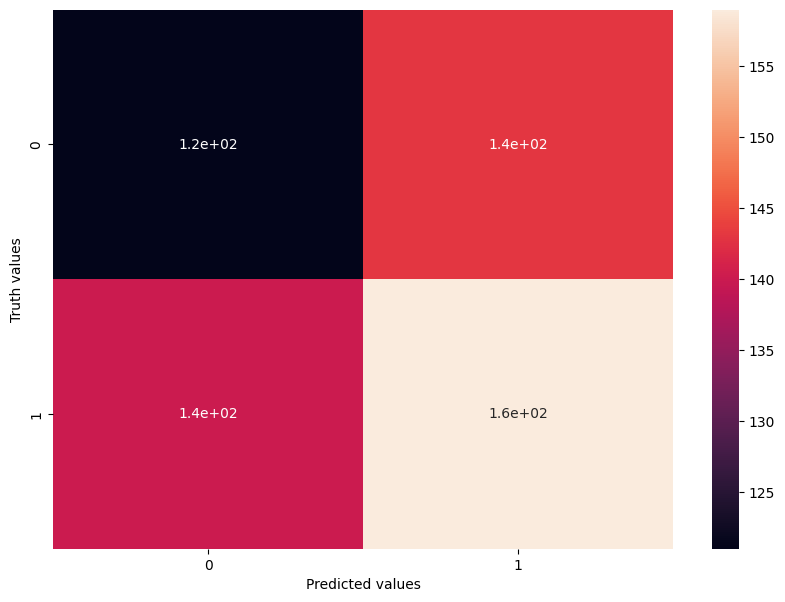

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Truth values')

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,stratify=Y, random_state=2)
d=DecisionTreeClassifier()
d=d.fit(X_train,Y_train)
Y_pred=d.predict(X_test)

In [ ]:
print('accuracy:',metrics.accuracy_score(Y_test,Y_pred))

accuracy: 0.9094138543516874


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred)
cm

array([[121, 143],
       [140, 159]])

Text(95.72222222222221, 0.5, 'Truth values')

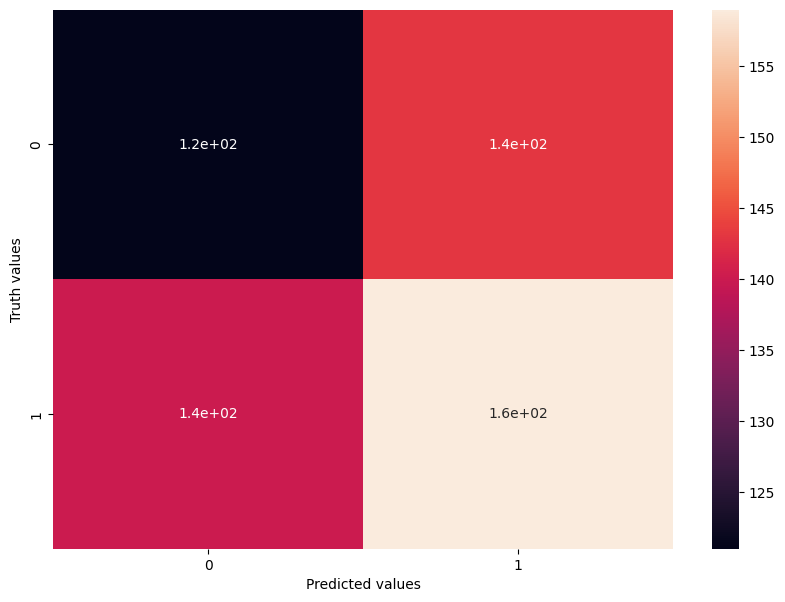

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Truth values')

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9155555555555556


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[204,  21],
       [ 17, 208]])

Text(95.72222222222221, 0.5, 'Truth values')

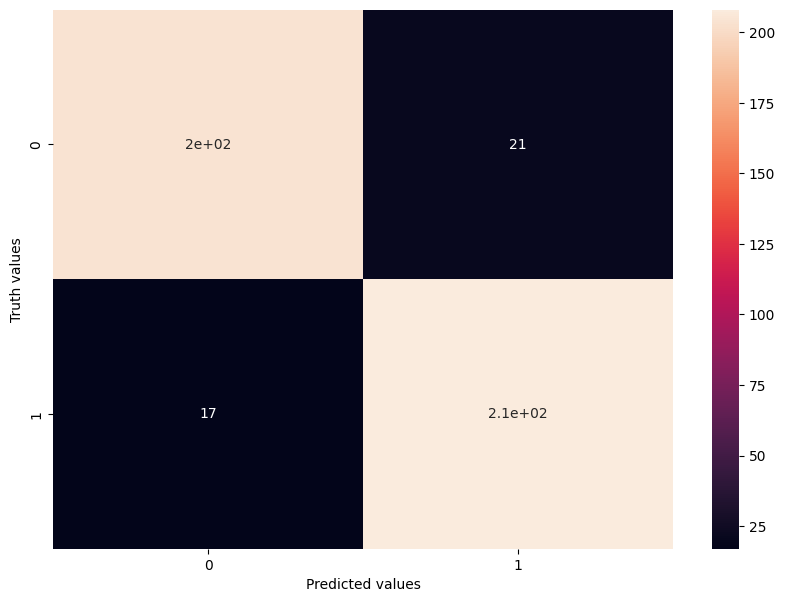

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Truth values')

SVM

In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train, Y_train)
print("Training Score:", sv.score(X_train, Y_train))
print("Testing Score:", sv.score(X_test, Y_test))


Training Score: 0.9294605809128631
Testing Score: 0.8969804618117229


In [ ]:
y_pred = sv.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[224,  34],
       [ 24, 281]])

Text(95.72222222222221, 0.5, 'Truth values')

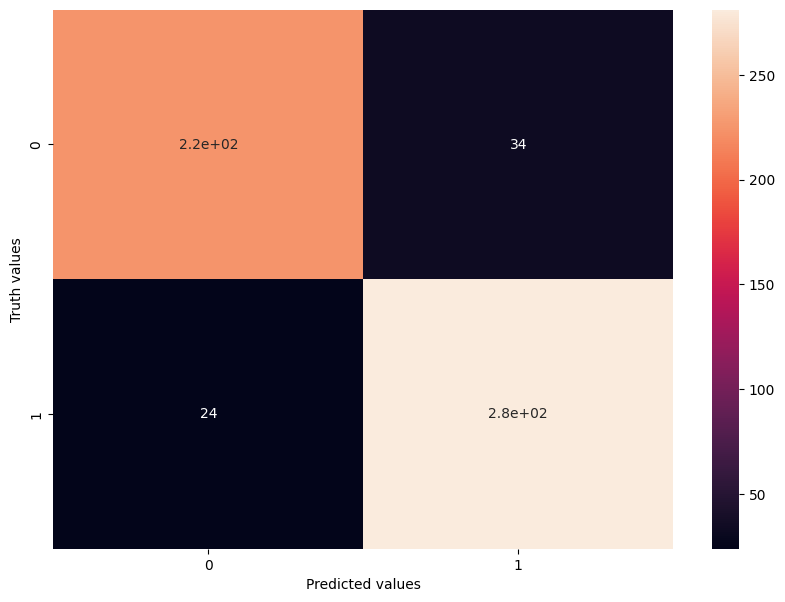

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Truth values')

TESTING THE MODEL

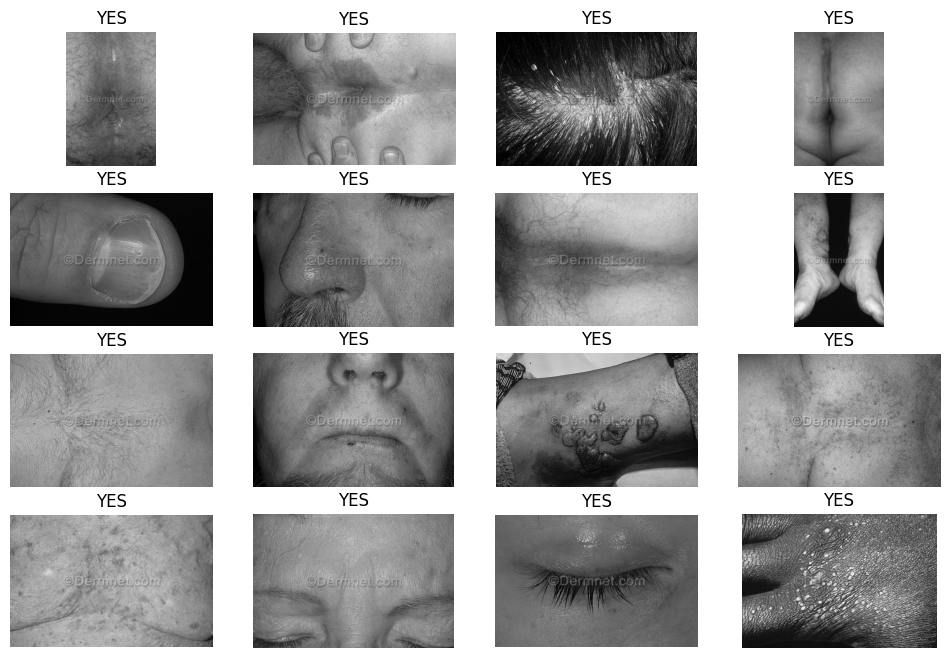

In [ ]:
dec={0:'NO',1:'YES'}
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/psorasis1/TEST')
c=1
for i in os.listdir('/content/drive/MyDrive/psorasis1/TEST/YES/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('/content/drive/MyDrive/psorasis1/TEST/YES/'+i,0)
    img1 = cv2.resize(img, (180,180))
    img1 = img1.reshape(1,-1)/255
    p = model.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

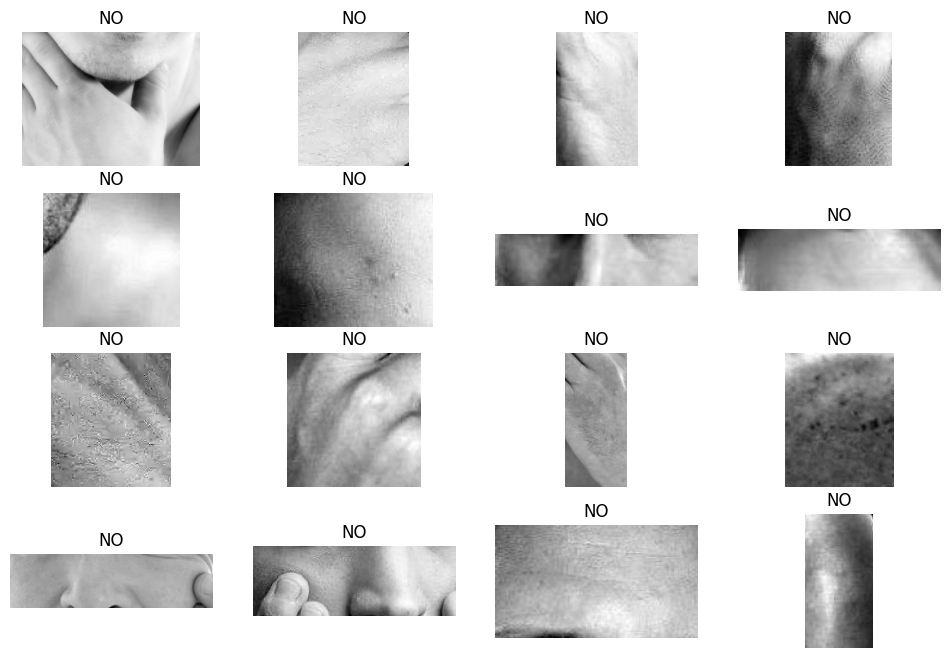

In [ ]:
dec={1:'YES',0:'NO'}
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/psorasis3/TEST')
c=1
for i in os.listdir('/content/drive/MyDrive/psorasis3/TEST/NO/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('/content/drive/MyDrive/psorasis3/TEST/NO/'+i,0)
    img1 = cv2.resize(img, (180,180))
    img1 = img1.reshape(1,-1)/255
    p = model.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1